# Building ML models for titanic dataset

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset to the python environment
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# The missing values of 'Age' can be replaced by the median
df['Age']=df['Age'].fillna(df['Age'].median())
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Finding the mode of the column 'Embarked'
embarked_mode = df['Embarked'].mode()
embarked_mode

0    S
Name: Embarked, dtype: object

In [9]:
# Replacing the missing values of 'Embarked' by the mode
df['Embarked']=df['Embarked'].fillna('S')
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
#  Majority of the values are missing in the column 'Cabin'
# its good to drop the feature 'Cabin'
df.drop('Cabin',inplace=True, axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

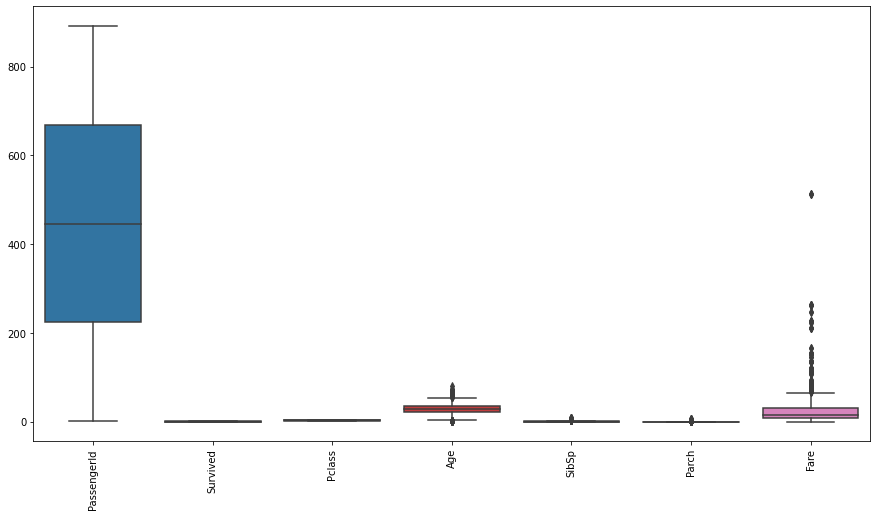

In [12]:
# Boxplot of the entire dataset
plt.figure(figsize=(15,8))
sns.boxplot(data= df)
plt.xticks(rotation = 90);

Text(0.5, 1.0, 'Box plot of Age')

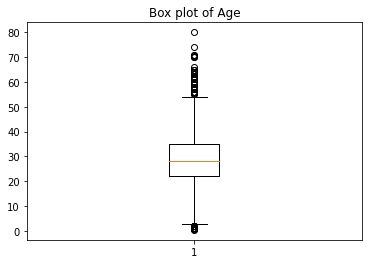

In [13]:
# Plotting the box plot of Age
plt.boxplot(df['Age'])
plt.title('Box plot of Age')

In [14]:
#Finding the outliers of Age

Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in df['Age']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)
print("\nThe outliers are : " ,outlier)

Q1 =  22.0
Q2 =  28.0
Q3 =  35.0

Lower limit =  2.5
Upper limit =  54.5

The outliers are :  [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [15]:
ind1 = df[(df["Age"] < low_limit) | (df["Age"] > up_limit)].index
df.loc[ind1].index

Int64Index([  7,  11,  15,  16,  33,  54,  78,  94,  96, 116, 119, 152, 164,
            170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305,
            326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492,
            493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659,
            672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 829, 831, 851,
            879],
           dtype='int64')

In [16]:
df.drop(ind1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Text(0.5, 1.0, 'Box plot of Age ')

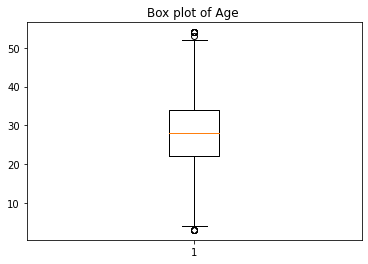

In [17]:
# Plotting the boxplot of Age after removing the outliers
plt.boxplot(df['Age'])
plt.title('Box plot of Age ')

Text(0.5, 1.0, 'Box plot of Fare')

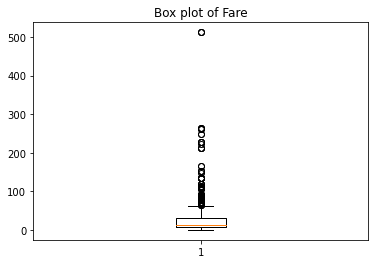

In [18]:
# Plotting the box plot of Fare

plt.boxplot(df['Fare'])
plt.title('Box plot of Fare')

In [19]:
#Finding the outliers of Age

Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in df['Fare']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)
print("\nThe outliers are : " ,outlier)

Q1 =  7.8958
Q2 =  13.4167
Q3 =  30.0708

Lower limit =  -25.366699999999994
Upper limit =  63.333299999999994

The outliers are :  [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1583, 69.55, 89.1042, 164.8667, 69.55]


In [20]:
ind2 = df[(df["Fare"] < low_limit) | (df["Fare"] > up_limit)].index
df.loc[ind2].index

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88,  97,
            ...
            779, 789, 792, 802, 820, 835, 846, 849, 856, 863],
           dtype='int64', length=107)

In [21]:
df.drop(ind2,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Text(0.5, 1.0, 'Box plot of Fare')

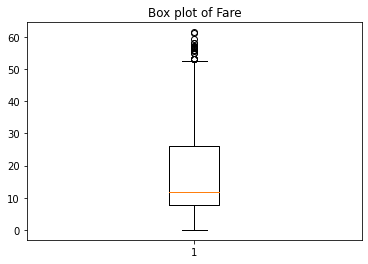

In [22]:
# Plotting the boxplot of Age after removing the outliers
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare')

Text(0.5, 1.0, 'Box plot of SibSp')

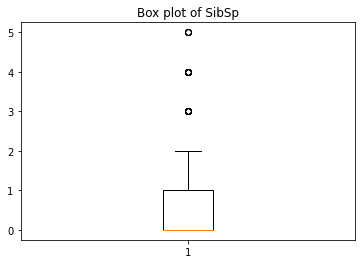

In [23]:
# Plotting the box plot of SibSp
plt.boxplot(df['SibSp'])
plt.title('Box plot of SibSp')

In [24]:
#Finding the outliers of SibSp

Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in df['SibSp']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)
print("\nThe outliers are : " ,outlier)

Q1 =  0.0
Q2 =  0.0
Q3 =  1.0

Lower limit =  -1.5
Upper limit =  2.5

The outliers are :  [3, 4, 5, 3, 4, 5, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 4, 3, 4]


In [25]:
ind3 = df[(df["SibSp"] < low_limit) | (df["SibSp"] > up_limit)].index
df.loc[ind3].index

Int64Index([ 24,  50,  59,  63,  68,  71,  85, 171, 176, 182, 229, 233, 261,
            266, 278, 374, 409, 480, 485, 541, 542, 634, 683, 686, 726, 787,
            813, 819, 850],
           dtype='int64')

In [26]:
df.drop(ind3,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Text(0.5, 1.0, 'Box plot of SibSp')

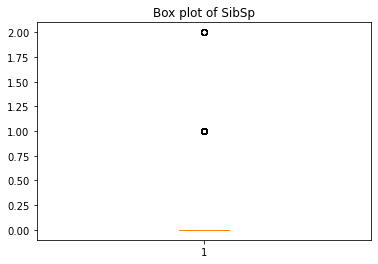

In [27]:
# Plotting the boxplot of SibSp after removing the outliers
plt.boxplot(df['SibSp'])
plt.title('Box plot of SibSp')

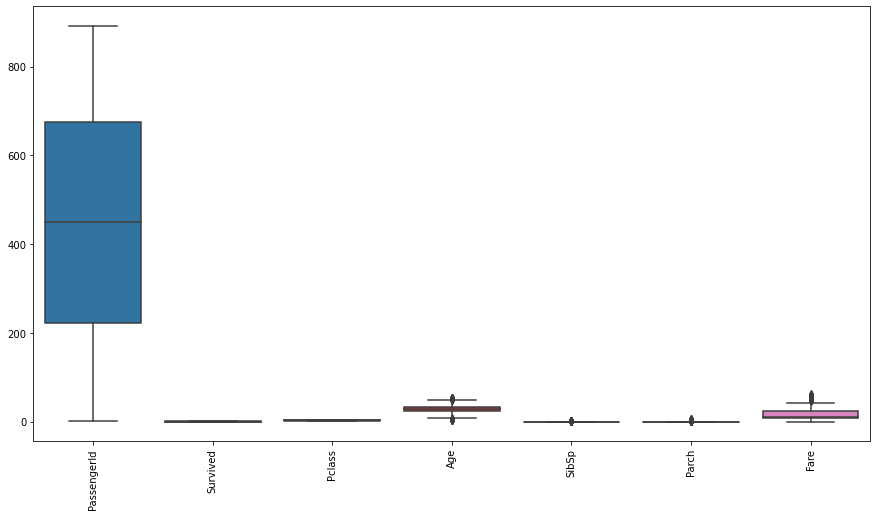

In [28]:
# Boxplot of the entire dataset after removing outliers
plt.figure(figsize=(15,8))
sns.boxplot(data= df)
plt.xticks(rotation = 90);

In [29]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [30]:
df['Ticket'].value_counts()

1601          7
W./C. 6608    4
LINE          4
371110        3
248727        3
             ..
226593        1
9234          1
19988         1
2693          1
370376        1
Name: Ticket, Length: 596, dtype: int64

In [31]:
df['Sex'].value_counts()

male      474
female    215
Name: Sex, dtype: int64

In [32]:
df['Embarked'].value_counts()

S    517
C    104
Q     68
Name: Embarked, dtype: int64

In [33]:
df.drop('Name',inplace=True,axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
5,6,0,3,male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [34]:
df.drop('Ticket',inplace=True,axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,28.0,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [35]:
# Label encoding  'Sex'
from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
a=['Sex']
for i in np.arange(len(a)):
    df[a[i]]=labelenc.fit_transform(df[a[i]])

In [36]:
# Label encoding  'Embarked'
from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
b=['Embarked']
for i in np.arange(len(b)):
    df[b[i]]=labelenc.fit_transform(df[b[i]])

In [37]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
5,6,0,3,1,28.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [38]:
df.set_index('PassengerId',inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
6,0,3,1,28.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2
889,0,3,0,28.0,1,2,23.4500,2


In [39]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [40]:
# Setting x and y parameters
# x denotes feature columns and y denotes target columns
x=df.drop(['Survived'],axis=1)
y=pd.DataFrame(df['Survived'])
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2
6,3,1,28.0,0,0,8.4583,1
...,...,...,...,...,...,...,...
887,2,1,27.0,0,0,13.0000,2
888,1,0,19.0,0,0,30.0000,2
889,3,0,28.0,1,2,23.4500,2


In [41]:
# Minmax Scaling
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)


In [42]:
x

,0,1,2,3,4,5,6
0,1.0,1.0,0.372549,0.5,0.000000,0.118118,1.0
1,1.0,0.0,0.450980,0.0,0.000000,0.129115,1.0
2,0.0,0.0,0.627451,0.5,0.000000,0.865114,1.0
3,1.0,1.0,0.627451,0.0,0.000000,0.131152,1.0
4,1.0,1.0,0.490196,0.0,0.000000,0.137804,0.5
...,...,...,...,...,...,...,...
684,0.5,1.0,0.470588,0.0,0.000000,0.211798,1.0
685,0.0,0.0,0.313725,0.0,0.000000,0.488765,1.0
686,1.0,0.0,0.490196,0.5,0.333333,0.382051,1.0
687,0.0,1.0,0.450980,0.0,0.000000,0.488765,0.0


In [43]:
y

,Survived
PassengerId,
1,0
3,1
4,1
5,0
6,0
...,...
887,0
888,1
889,0


In [44]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [45]:
x_train.shape

(482, 7)

In [46]:
y_train.shape

(482, 1)

In [47]:
x_test.shape

(207, 7)

In [48]:
y_test.shape

(207, 1)

In [49]:
# Model 1 : Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [50]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,recall_score,precision_score
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred),3))
print('Precision :',round(precision_score(y_test,y_pred),3))

Confusion matrix : 
 [[106  22]
 [ 26  53]]
F1_score : 0.688
Accuracy : 0.768
Recall : 0.671
Precision : 0.707


In [51]:
# Model 2 : KNN
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[0.7777777777777778,
 0.7777777777777778,
 0.7632850241545893,
 0.7777777777777778,
 0.7874396135265701,
 0.7874396135265701,
 0.7922705314009661,
 0.7971014492753623,
 0.7922705314009661,
 0.7971014492753623,
 0.7874396135265701,
 0.7777777777777778]

Text(0, 0.5, 'Accuracy')

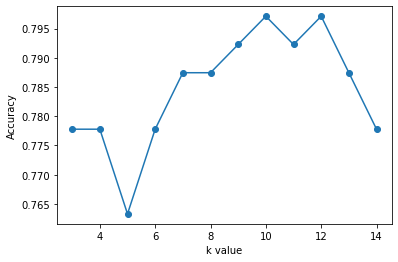

In [52]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

Highest accuracy 0.70 for k value 12

Can make a model with k as 12

In [53]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [54]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred,average='micro'),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred),3))
print('Precision :',round(precision_score(y_test,y_pred),3))

Confusion matrix : 
 [[116  12]
 [ 34  45]]
F1_score : 0.778
Accuracy : 0.778
Recall : 0.57
Precision : 0.789


In [55]:
# Model 3 : Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [56]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred),3))
print('Precision :',round(precision_score(y_test,y_pred),3))

Confusion matrix : 
 [[106  22]
 [ 21  58]]
F1_score : 0.73
Accuracy : 0.792
Recall : 0.734
Precision : 0.725


In [57]:
# Model 4 : Linear SVM
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [58]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred),3))
print('Precision :',round(precision_score(y_test,y_pred),3))

Confusion matrix : 
 [[106  22]
 [ 25  54]]
F1_score : 0.697
Accuracy : 0.773
Recall : 0.684
Precision : 0.711


In [59]:
# Model 5 : Polynomial SVM
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [60]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred),3))
print('Precision :',round(precision_score(y_test,y_pred),3))

Confusion matrix : 
 [[108  20]
 [ 25  54]]
F1_score : 0.706
Accuracy : 0.783
Recall : 0.684
Precision : 0.73


In [61]:
# Model 6 : Radial SVM
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [62]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred),3))
print('Precision :',round(precision_score(y_test,y_pred),3))

Confusion matrix : 
 [[107  21]
 [ 25  54]]
F1_score : 0.701
Accuracy : 0.778
Recall : 0.684
Precision : 0.72


In [63]:
# Model 7 : Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [64]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred),3))
print('Precision :',round(precision_score(y_test,y_pred),3))

Confusion matrix : 
 [[109  19]
 [ 23  56]]
F1_score : 0.727
Accuracy : 0.797
Recall : 0.709
Precision : 0.747


In [65]:
# Model 8 : Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [66]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred),3))
print('Precision :',round(precision_score(y_test,y_pred),3))

Confusion matrix : 
 [[112  16]
 [ 21  58]]
F1_score : 0.758
Accuracy : 0.821
Recall : 0.734
Precision : 0.784


In [67]:
# Model 9 : Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [68]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [69]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 

Confusion matrix : 
 [[95 33]
 [17 62]]
Accuracy : 0.758


In [70]:
# Model 9 : Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)

BernoulliNB()

In [71]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [72]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 

Confusion matrix : 
 [[104  24]
 [ 22  57]]
Accuracy : 0.778


Of all the models built, the accuracy score of the Gradient Boosting model is the highest (0.821) and hence Gradient Boosting Model  can 

be used to predict the result.